In [5]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [6]:
df = pd.read_csv('vowel.dat',header=None,sep = ',')
train = df[df[0] == 0]
test = df[df[0] == 1]

X = train.iloc[:,3:13].to_numpy()
y = train.iloc[:,-1:].to_numpy().reshape(528)
testX = test.iloc[:,3:13].to_numpy()
testy = test.iloc[:,-1:].to_numpy().reshape(462)

numbers = [*range(11)] # number 2 > number 1
number_of_classification = 11


list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

test_list_y =testy.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(test_list_y)) if test_list_y[i] == digit]
    digits_indexes.extend(li)

test_x_inputs =[tuple(c) for c in testX[digits_indexes].tolist()]
test_x_outputs = [tuple(c) for c in testy[digits_indexes].reshape(462,1).tolist()]

In [9]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

def get_winner(class1):
    
    numbers = [*range(11)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 528
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 45)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-vowel2")
    [stats, winner] = run(config_path)
    
    return winner

In [10]:
winner_list = []
classes = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:48
number of class2:480

 ****** Running generation 0 ****** 

Population's average fitness: 0.51430 stdev: 0.33020
Best fitness: 0.95833 - size: (2, 2) - species 6 - id 157
Average adjusted fitness: 0.486
Mean genetic distance 2.692, standard deviation 0.557
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 0.836 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.68834 stdev: 0.32414
Best fitness: 0.95833 - size: (2, 2) - species 6 - id 157
Average adjusted fitness: 0.613
Mean genetic distance 2.724, standard deviation 0.559
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 1.214 sec (1.025 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.72202 stdev: 0.30675
Best fitness: 0.95833 - size: (2, 2) - species 1 - id 540
Average adjusted fitness: 0.685
Mean genetic distance 2.651, standard deviation 0.556
Population of 200 members in 15 species
Total extinctions: 

Population's average fitness: 0.77542 stdev: 0.30664
Best fitness: 0.97348 - size: (4, 7) - species 15 - id 1575
Average adjusted fitness: 0.686
Mean genetic distance 2.910, standard deviation 0.565
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 1.280 sec (1.302 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.78239 stdev: 0.29831
Best fitness: 0.97348 - size: (4, 7) - species 15 - id 1575
Average adjusted fitness: 0.702
Mean genetic distance 2.923, standard deviation 0.572
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 1.341 sec (1.304 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.83739 stdev: 0.23317
Best fitness: 0.97348 - size: (4, 7) - species 15 - id 1575
Average adjusted fitness: 0.730
Mean genetic distance 2.932, standard deviation 0.576
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 1.913 sec (1.372 average)

 ****** Ru

Population's average fitness: 0.74203 stdev: 0.28312
Best fitness: 0.92235 - size: (2, 2) - species 6 - id 698
Average adjusted fitness: 0.618
Mean genetic distance 2.733, standard deviation 0.579
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 1.040 sec (0.948 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.74571 stdev: 0.28305
Best fitness: 0.92235 - size: (2, 2) - species 6 - id 698
Average adjusted fitness: 0.643
Mean genetic distance 2.785, standard deviation 0.566
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 1.111 sec (0.981 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.78451 stdev: 0.25214
Best fitness: 0.92424 - size: (5, 8) - species 7 - id 912
Average adjusted fitness: 0.647
Mean genetic distance 2.702, standard deviation 0.552
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 1.140 sec (1.007 average)

 ****** Running ge

Population's average fitness: 0.75626 stdev: 0.28539
Best fitness: 0.93939 - size: (5, 9) - species 26 - id 3984
Average adjusted fitness: 0.663
Mean genetic distance 3.092, standard deviation 0.621
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 1.428 sec (1.519 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.79451 stdev: 0.24961
Best fitness: 0.93939 - size: (5, 9) - species 26 - id 3984
Average adjusted fitness: 0.660
Mean genetic distance 3.128, standard deviation 0.609
Population of 192 members in 21 species
Total extinctions: 0
Generation time: 1.476 sec (1.452 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.73060 stdev: 0.30447
Best fitness: 0.93939 - size: (5, 9) - species 26 - id 3984
Average adjusted fitness: 0.614
Mean genetic distance 3.110, standard deviation 0.601
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 1.591 sec (1.465 average)

 ****** Ru

Population's average fitness: 0.76314 stdev: 0.27727
Best fitness: 0.91477 - size: (5, 8) - species 4 - id 1258
Average adjusted fitness: 0.663
Mean genetic distance 2.771, standard deviation 0.608
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 1.405 sec (1.201 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.76973 stdev: 0.25813
Best fitness: 0.91477 - size: (5, 8) - species 4 - id 1258
Average adjusted fitness: 0.679
Mean genetic distance 2.801, standard deviation 0.591
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 1.520 sec (1.241 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.82665 stdev: 0.20462
Best fitness: 0.91477 - size: (5, 8) - species 7 - id 1258
Average adjusted fitness: 0.742
Mean genetic distance 2.835, standard deviation 0.607
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 1.438 sec (1.263 average)

 ****** Running

Population's average fitness: 0.83560 stdev: 0.21588
Best fitness: 0.92424 - size: (5, 9) - species 5 - id 1756
Average adjusted fitness: 0.751
Mean genetic distance 3.116, standard deviation 0.567
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 1.575 sec (1.425 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.82351 stdev: 0.22642
Best fitness: 0.92424 - size: (5, 9) - species 5 - id 1756
Average adjusted fitness: 0.727
Mean genetic distance 3.110, standard deviation 0.563
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 1.177 sec (1.395 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.82980 stdev: 0.21847
Best fitness: 0.92424 - size: (5, 9) - species 5 - id 1756
Average adjusted fitness: 0.740
Mean genetic distance 3.122, standard deviation 0.570
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 1.505 sec (1.381 average)

 ****** Runni

Population's average fitness: 0.78413 stdev: 0.27084
Best fitness: 0.93371 - size: (6, 10) - species 11 - id 1754
Average adjusted fitness: 0.643
Mean genetic distance 2.747, standard deviation 0.564
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 1.075 sec (0.976 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.80892 stdev: 0.23543
Best fitness: 0.93371 - size: (6, 10) - species 11 - id 1754
Average adjusted fitness: 0.672
Mean genetic distance 2.780, standard deviation 0.557
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 1.086 sec (1.013 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.75910 stdev: 0.27182
Best fitness: 0.93371 - size: (6, 10) - species 11 - id 1754
Average adjusted fitness: 0.633
Mean genetic distance 2.777, standard deviation 0.526
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 1.113 sec (1.031 average)

 ******

Population's average fitness: 0.77459 stdev: 0.26909
Best fitness: 0.94508 - size: (7, 14) - species 30 - id 4641
Average adjusted fitness: 0.682
Mean genetic distance 2.985, standard deviation 0.602
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 1.555 sec (1.523 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.78263 stdev: 0.26303
Best fitness: 0.94508 - size: (7, 14) - species 30 - id 4641
Average adjusted fitness: 0.703
Mean genetic distance 3.005, standard deviation 0.545
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 1.925 sec (1.578 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.77613 stdev: 0.26258
Best fitness: 0.94508 - size: (7, 14) - species 30 - id 4641
Average adjusted fitness: 0.696
Mean genetic distance 3.020, standard deviation 0.565
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 1.719 sec (1.614 average)

 ******

Population's average fitness: 0.78772 stdev: 0.25423
Best fitness: 0.91856 - size: (4, 7) - species 8 - id 1057
Average adjusted fitness: 0.667
Mean genetic distance 2.951, standard deviation 0.673
Population of 207 members in 24 species
Total extinctions: 0
Generation time: 0.949 sec (0.981 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.76456 stdev: 0.27155
Best fitness: 0.91856 - size: (4, 7) - species 8 - id 1057
Average adjusted fitness: 0.627
Mean genetic distance 2.948, standard deviation 0.675
Population of 207 members in 25 species
Total extinctions: 0
Generation time: 0.998 sec (0.989 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.79476 stdev: 0.24833
Best fitness: 0.91856 - size: (4, 7) - species 8 - id 1057
Average adjusted fitness: 0.660
Mean genetic distance 2.955, standard deviation 0.694
Population of 207 members in 25 species
Total extinctions: 0
Generation time: 1.012 sec (0.990 average)

 ****** Runni

Population's average fitness: 0.82994 stdev: 0.21467
Best fitness: 0.92235 - size: (5, 7) - species 26 - id 3152
Average adjusted fitness: 0.647
Mean genetic distance 3.221, standard deviation 0.580
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 1.100 sec (1.267 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.80094 stdev: 0.24828
Best fitness: 0.92235 - size: (5, 7) - species 26 - id 3152
Average adjusted fitness: 0.615
Mean genetic distance 3.259, standard deviation 0.569
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 1.138 sec (1.231 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.81072 stdev: 0.24377
Best fitness: 0.92235 - size: (5, 7) - species 26 - id 3152
Average adjusted fitness: 0.641
Mean genetic distance 3.241, standard deviation 0.568
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 1.112 sec (1.173 average)

 ****** Ru

Population's average fitness: 0.78053 stdev: 0.25612
Best fitness: 0.91098 - size: (2, 3) - species 6 - id 1308
Average adjusted fitness: 0.681
Mean genetic distance 2.814, standard deviation 0.666
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 0.858 sec (0.884 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.81688 stdev: 0.21084
Best fitness: 0.91098 - size: (2, 3) - species 6 - id 1308
Average adjusted fitness: 0.726
Mean genetic distance 2.870, standard deviation 0.682
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 0.909 sec (0.889 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.77904 stdev: 0.25878
Best fitness: 0.91098 - size: (2, 3) - species 6 - id 1308
Average adjusted fitness: 0.676
Mean genetic distance 2.912, standard deviation 0.692
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 0.867 sec (0.891 average)

 ****** Runni

Population's average fitness: 0.77470 stdev: 0.24787
Best fitness: 0.91667 - size: (2, 4) - species 2 - id 5050
Average adjusted fitness: 0.640
Mean genetic distance 2.775, standard deviation 0.585
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 1.222 sec (1.162 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.75725 stdev: 0.26931
Best fitness: 0.91667 - size: (2, 4) - species 2 - id 5050
Average adjusted fitness: 0.636
Mean genetic distance 2.807, standard deviation 0.588
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 1.101 sec (1.170 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.77417 stdev: 0.26022
Best fitness: 0.91667 - size: (2, 4) - species 2 - id 5050
Average adjusted fitness: 0.640
Mean genetic distance 2.877, standard deviation 0.591
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 1.123 sec (1.178 average)

 ****** Runni

Population's average fitness: 0.72991 stdev: 0.28367
Best fitness: 0.91856 - size: (3, 3) - species 14 - id 1676
Average adjusted fitness: 0.532
Mean genetic distance 2.843, standard deviation 0.654
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 1.102 sec (1.015 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.70511 stdev: 0.29796
Best fitness: 0.91856 - size: (3, 3) - species 14 - id 1676
Average adjusted fitness: 0.553
Mean genetic distance 2.854, standard deviation 0.616
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 1.029 sec (1.015 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.75691 stdev: 0.25605
Best fitness: 0.91856 - size: (3, 3) - species 14 - id 1676
Average adjusted fitness: 0.623
Mean genetic distance 2.833, standard deviation 0.610
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 1.102 sec (1.024 average)

 ****** Run

Population's average fitness: 0.80941 stdev: 0.22101
Best fitness: 0.92614 - size: (6, 12) - species 46 - id 6544
Average adjusted fitness: 0.699
Mean genetic distance 3.166, standard deviation 0.549
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 1.253 sec (1.406 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.79928 stdev: 0.24431
Best fitness: 0.92614 - size: (6, 12) - species 46 - id 6544
Average adjusted fitness: 0.686
Mean genetic distance 3.163, standard deviation 0.572
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 1.177 sec (1.369 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.82205 stdev: 0.21311
Best fitness: 0.92614 - size: (6, 12) - species 46 - id 6544
Average adjusted fitness: 0.708
Mean genetic distance 3.139, standard deviation 0.556
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 1.167 sec (1.317 average)
number o

Population's average fitness: 0.83015 stdev: 0.19667
Best fitness: 0.93561 - size: (4, 6) - species 5 - id 781
Average adjusted fitness: 0.742
Mean genetic distance 2.967, standard deviation 0.581
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 1.290 sec (1.312 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.82502 stdev: 0.21054
Best fitness: 0.93561 - size: (4, 6) - species 5 - id 781
Average adjusted fitness: 0.718
Mean genetic distance 3.008, standard deviation 0.606
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 1.254 sec (1.322 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.79635 stdev: 0.23405
Best fitness: 0.93561 - size: (4, 6) - species 5 - id 781
Average adjusted fitness: 0.698
Mean genetic distance 2.989, standard deviation 0.616
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 1.297 sec (1.335 average)

 ****** Running 

Population's average fitness: 0.50629 stdev: 0.31562
Best fitness: 0.90909 - size: (2, 2) - species 2 - id 11
Average adjusted fitness: 0.448
Mean genetic distance 2.638, standard deviation 0.534
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 0.890 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.71133 stdev: 0.29004
Best fitness: 0.90909 - size: (3, 2) - species 7 - id 210
Average adjusted fitness: 0.575
Mean genetic distance 2.739, standard deviation 0.566
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 1.045 sec (0.968 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.78727 stdev: 0.23890
Best fitness: 0.90909 - size: (2, 2) - species 3 - id 182
Average adjusted fitness: 0.630
Mean genetic distance 2.798, standard deviation 0.606
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 0.962 sec (0.966 average)

 ****** Running generation 3 ******

Population's average fitness: 0.80803 stdev: 0.24089
Best fitness: 0.92045 - size: (3, 4) - species 26 - id 3794
Average adjusted fitness: 0.626
Mean genetic distance 3.047, standard deviation 0.637
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 1.098 sec (1.186 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.81360 stdev: 0.23456
Best fitness: 0.92045 - size: (3, 4) - species 26 - id 3794
Average adjusted fitness: 0.661
Mean genetic distance 3.100, standard deviation 0.627
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 1.044 sec (1.140 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.79607 stdev: 0.23866
Best fitness: 0.92045 - size: (3, 4) - species 26 - id 3794
Average adjusted fitness: 0.646
Mean genetic distance 3.133, standard deviation 0.626
Population of 204 members in 19 species
Total extinctions: 0
Generation time: 1.101 sec (1.126 average)

 ****** Ru

Population's average fitness: 0.73062 stdev: 0.29416
Best fitness: 0.91667 - size: (2, 2) - species 4 - id 175
Average adjusted fitness: 0.553
Mean genetic distance 2.762, standard deviation 0.599
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 1.182 sec (1.027 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.70205 stdev: 0.30125
Best fitness: 0.92614 - size: (5, 8) - species 2 - id 1004
Average adjusted fitness: 0.558
Mean genetic distance 2.767, standard deviation 0.588
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 1.047 sec (1.030 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.72625 stdev: 0.29857
Best fitness: 0.92614 - size: (4, 5) - species 7 - id 1145
Average adjusted fitness: 0.582
Mean genetic distance 2.706, standard deviation 0.574
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 1.034 sec (1.031 average)

 ****** Running 

Population's average fitness: 0.78073 stdev: 0.25733
Best fitness: 0.93561 - size: (3, 4) - species 29 - id 2328
Average adjusted fitness: 0.663
Mean genetic distance 3.076, standard deviation 0.532
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 1.203 sec (1.277 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.81905 stdev: 0.22662
Best fitness: 0.93561 - size: (3, 4) - species 29 - id 2328
Average adjusted fitness: 0.699
Mean genetic distance 3.070, standard deviation 0.503
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 1.266 sec (1.262 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.80147 stdev: 0.22430
Best fitness: 0.93561 - size: (3, 4) - species 29 - id 2328
Average adjusted fitness: 0.666
Mean genetic distance 3.059, standard deviation 0.514
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 1.485 sec (1.256 average)

 ****** Ru

Population's average fitness: 0.75505 stdev: 0.27133
Best fitness: 0.90909 - size: (4, 8) - species 12 - id 1295
Average adjusted fitness: 0.625
Mean genetic distance 2.909, standard deviation 0.613
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 1.051 sec (0.987 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.78455 stdev: 0.24484
Best fitness: 0.90909 - size: (4, 8) - species 12 - id 1295
Average adjusted fitness: 0.644
Mean genetic distance 2.789, standard deviation 0.605
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 1.126 sec (1.002 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.79800 stdev: 0.24217
Best fitness: 0.90909 - size: (7, 13) - species 8 - id 1636
Average adjusted fitness: 0.676
Mean genetic distance 2.843, standard deviation 0.608
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 1.180 sec (1.020 average)

 ****** Runn

Population's average fitness: 0.85422 stdev: 0.17233
Best fitness: 0.90909 - size: (8, 14) - species 26 - id 4590
Average adjusted fitness: 0.772
Mean genetic distance 2.980, standard deviation 0.604
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 1.291 sec (1.317 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.82265 stdev: 0.22408
Best fitness: 0.90909 - size: (8, 14) - species 26 - id 4590
Average adjusted fitness: 0.738
Mean genetic distance 2.931, standard deviation 0.608
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 1.194 sec (1.298 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.81769 stdev: 0.22732
Best fitness: 0.90909 - size: (5, 7) - species 35 - id 5790
Average adjusted fitness: 0.733
Mean genetic distance 2.972, standard deviation 0.617
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 1.215 sec (1.286 average)

 ****** 

In [11]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-vowel2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [12]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(11)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [13]:
pred_value = []
error_list = []

for j in range(462):
    pred = []
    for i in range(11):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    pred_array = np.array(pred).reshape(11,)
    #print(pred_array)
    if (np.sum(pred_array) >= 1):
        pred_value.append(np.where(pred_array==1))
    else:
        pred_value.append(np.array(range(11)))

In [30]:
import random

list_P = []
for i in range(462):
    if (len(pred_value[i])== 1):
        #print(pred_value[i][0], digits.target[1617+i])
        list_P.append(random.sample(pred_value[i][0].tolist(),1)[0])
    else:
        list_P.append(random.sample(pred_value[i].tolist(),1)[0])
np.sum(list_P == testy)/462

0.24242424242424243

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[27  5  2  1  6  4  2  0  1  2  1]
 [ 3  8  6  1  2  4  4  1  4  2  4]
 [ 3  3  3  4  3  2  4  1  4  1  5]
 [ 1  1  5 18  1  4  6  3  3  2  2]
 [ 0  2  4  1  3  4  4  6  1  4  4]
 [ 0  6  6  5  2  2  3  2  4  2  5]
 [ 0  5  3  2  9  4  5  7  6  2  3]
 [ 0  3  4  4  2  7  1 20 10  7  3]
 [ 2  3  1  2  8  2  4  1  5  3  7]
 [ 6  3  2  2  0  4  5  1  0 17  4]
 [ 0  3  6  2  6  5  4  0  4  0  4]]


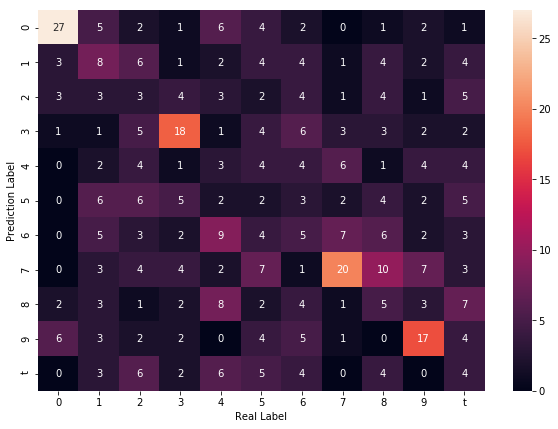

In [32]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "0123456789t"],
                  columns = [i for i in "0123456789t"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [ ]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(511):
        [pred_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)

    error = []
    for i in range(10):
        error.append(511 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)

    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

acc = np.sum(list_P == digits.target[:1617])/1617
print(acc)

In [ ]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
np.mean(winner_fitness)